In [1]:
import os, sys
import numpy as np
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator, Locator

In [3]:
FILTER_DIFFICULT = True
SAVE_VIS_IMAGES = True
SHOW = True

COLORMAP = {'person': 'r', 'car': 'c', 'bus': 'm', 
            'bicycle': 'y', 'motorbike': 'g'}

In [2]:
def parse_annotation(path):
    assert(os.path.exists(path)), \
        'Annotation: {} does not exist'.format(path)
    tree = ET.parse(path)
    objs = tree.findall('object')
    boxes = []
    for obj in objs:
        bbox = obj.find('bndbox')
        x1 = float(bbox.find('xmin').text) - 1.0
        y1 = float(bbox.find('ymin').text) - 1.0
        x2 = float(bbox.find('xmax').text) - 1.0
        y2 = float(bbox.find('ymax').text) - 1.0
        box = [x1, y1, x2, y2]
        cls = obj.find('name').text.lower().lower()
        difficult = int(obj.find('difficult').text) == 1
        if FILTER_DIFFICULT:
            if not difficult:
                boxes.append({'cls': cls, 'box': box})
        else:
            boxes.append({'cls': cls, 'box': box})
    return boxes

def show_box(im, boxes, show=True, save_path=None):
    im = im[:, :, (2, 1, 0)]
    plt.cla()
    plt.imshow(im)
    for item in boxes:
        box = item['box']
        cls = item['cls']
        plt.gca().add_patch(
            plt.Rectangle((box[0], box[1]), 
                            box[2] - box[0], 
                            box[3] - box[1], fill=False, 
                            edgecolor=COLORMAP[cls], 
                            linewidth=1.5))
        plt.text(box[0], box[1]-2, cls, fontsize=8, 
            bbox=dict(facecolor='blue', alpha=0.5), color='white')
    plt.axis('off')
    ax = plt.gca()
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()

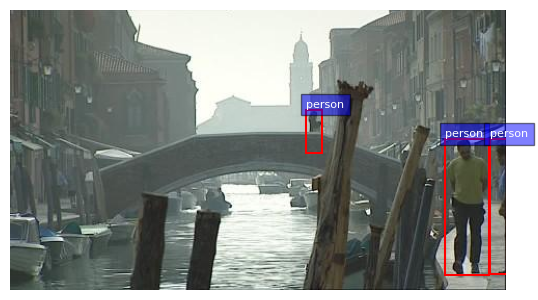

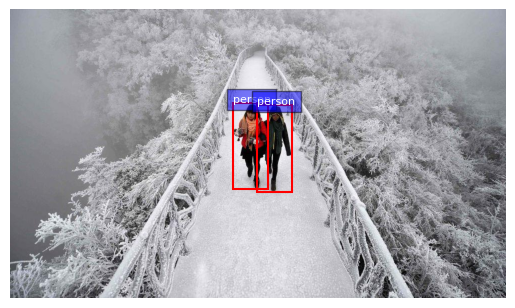

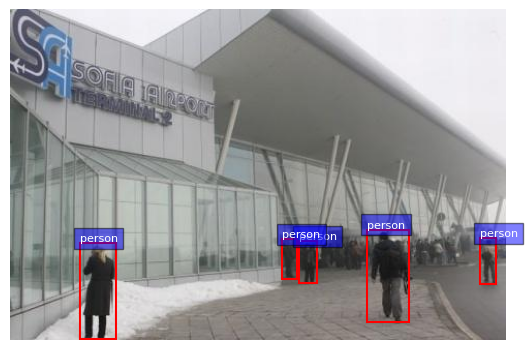

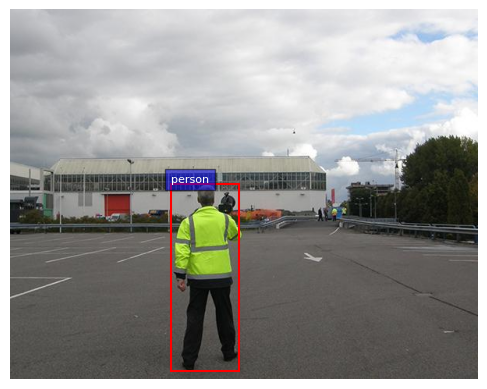

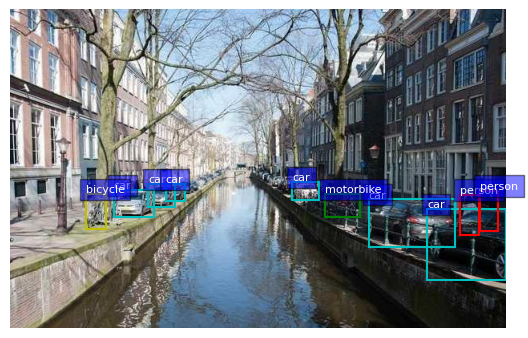

In [10]:
if __name__ == '__main__':
    # You should specify the dataset_dir and save_dir according to your own dataset's directory
    dataset_dir = '.'
    save_dir = './visualize_gt_boxes'
    dest_files = os.path.join(dataset_dir, 'ImageSets', 'Main', 'test.txt')
    im_dir = os.path.join(dataset_dir, 'JPEGImages')
    anno_dir = os.path.join(dataset_dir, 'Annotations')
    if SAVE_VIS_IMAGES and not os.path.exists(save_dir):
        os.makedirs(save_dir)
    with open(dest_files, 'r') as f:
        names = f.readlines()
    names = [im.strip() for im in names]
    # You can just choose the first N images to visualize their annotations
    names = names[:5]
    for name in names:
        im_path = os.path.join(im_dir, name + '.png')
        anno_path = os.path.join(anno_dir, name + '.xml')
        assert(os.path.exists(im_path)), \
            'Image: {} does not exist'.format(im_path)
        boxes = parse_annotation(anno_path)
        im = cv2.imread(im_path)
        save_path = None
        if SAVE_VIS_IMAGES:
            save_path = os.path.join(save_dir, name + '.png')
        show_box(im, boxes, show=SHOW ,save_path=save_path)